In [4]:
import pandas
import numpy
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [5]:
names = ['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'label']

In [6]:
training = 'pendigits.tra'
training_data = pandas.read_csv(training, names=names)
training_data.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,label
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


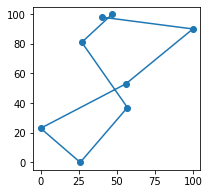

In [7]:
coor = training_data.drop('label', axis = 1).iloc[0].values.reshape(8, 2)
plt.figure(figsize=(3, 3))
plt.plot(coor[:, 0], coor[:, 1], 'o-')
plt.show()

In [8]:
test = 'pendigits.tes'
test_data = pandas.read_csv(test, names = names)
test_data.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,label
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9


In [9]:
train_feature = training_data.drop('label', axis = 1)
train_label = training_data['label']

In [10]:
test_feature = test_data.drop('label', axis = 1)
test_label = test_data['label']

# Initialize and Train Decision Tree

In [11]:
numpy.random.seed(0)
parameters = {'criterion' : ['gini', 'entropy'], 'max_depth' : range(1, 10)}
gs_tree = GridSearchCV(tree.DecisionTreeClassifier(), parameters, cv = 5)

In [12]:
model_tree = gs_tree.fit(train_feature, train_label)
model_tree.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [13]:
model_tree.refit_time_

0.10204315185546875

In [14]:
model_tree.score(test_feature, test_label)

0.9228130360205832

In [15]:
from joblib import dump, load

In [16]:
dump(model_tree, 'model_tree.joblib')

['model_tree.joblib']